In [1]:
from scipy.optimize import least_squares
import numpy as np
import matplotlib.pyplot as plt
import pickle

plt.rcParams.update({'font.size': 24,
                     'xtick.labelsize': 20,
                     'ytick.labelsize': 20,
                     'axes.titlesize': 28,
                     'axes.labelsize': 28,
                     'mathtext.fontset': 'stix',
                     'font.family': 'STIXGeneral'})

## Load runtime jobs and save to pickle
This code will not run, as it needs access to the QiskitRuntime account. However, the results have been pickled and can be accessed as seen in the plotting part below.

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()

jobs_dict = {
    "nairobi-7-qubits-no-dd-tau=100-shots=1024": [
        "caup5uma4p74378b0670",
        "caurlrj8lg9ob0gt3n3g",
        "cavgoh6a4p74378c3t80",
    ],
}

for key, jobs_list in jobs_dict.items():
    results = [service.job(job).result() for job in jobs_list]
    with open(f"pickles/{key}.pkl","wb") as file:
        pickle.dump(results, file)

## Plot pickles

In [2]:
def plot_results(results, label):
    """Plot a list of job results"""
    values = np.array([])
    y_true = np.array([])
    for result in results:
        values = np.append(values, result["values"])
        y_true = np.append(y_true, result["y_true"])

    qka_dict = results[-1]["qka"]
    thetas = np.array(qka_dict["thetas"]).reshape(-1)
    true_theta = np.array(qka_dict["data"]["X"])[:, -1]

    _, axs = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
    thetas = np.array(thetas).flatten()
    thetas = thetas % np.pi
    thetas[thetas > np.pi / 2] = thetas[thetas > np.pi / 2] - np.pi
    axs[0].set_ylabel(r"Parameter $\theta$")
    axs[0].plot(thetas, label="Pegasos QKA",color="crimson")
    axs[0].plot(true_theta, label=r"$\theta_{opt}(t)$",color="black",linestyle="dashed")
    axs[0].legend(loc="lower left")

    accuracy = np.sign(values) == y_true
    axs[1].plot(accuracy, alpha=0.2,color="lightcoral", label="Single shot accuracy")

    def rolling_mean(acc, bin=50):
        means = np.zeros(acc.shape)
        for i in range(len(means)):
            means[i] = np.mean(acc[max(0, i - bin) : i + 1])
        return means


    axs[1].plot(rolling_mean(accuracy), color="crimson", label="Mean over 50 iterations")
    axs[1].set_xlabel("Iteration $t$")
    axs[1].set_ylabel("Accuracy")
    axs[1].legend(loc="lower left")
    plt.savefig(f"plots/{label}.png", dpi=200)

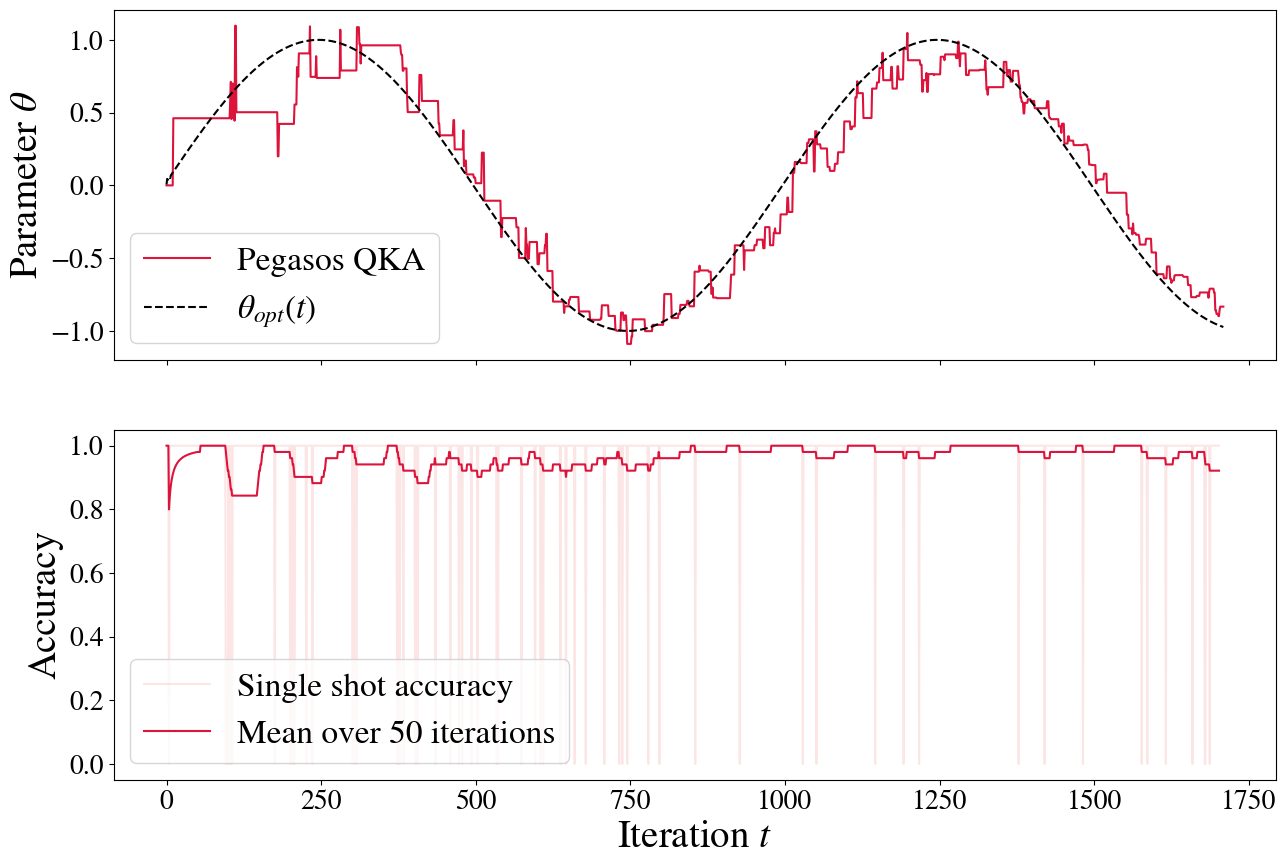

In [3]:
# 7 qubit experiment
with open("pickles/nairobi-7-qubits-no-dd-tau=100-shots=1024.pkl", "rb") as file:
    results = pickle.load(file)
    plot_results(results, "nairobi-7-qubits-no-dd-tau=100-shots=1024")
    plt.savefig("plots/nairobi-7-qubits-no-dd-tau=100-shots=1024.png", dpi=200)
    plt.show()